In [10]:
import xarray as xr
import movingpandas as mpd
from datetime import timedelta
import base64
# poetry run jupyter nbconvert aquainfra_presentation.ipynb --to slides --post serve
# on https://aqua.usegalaxy.eu
    # select Jupyter Interactive GIS Tool 
    # conda install xarray netcdf4

# Overview - North Sea

* Metadata 
    - Discovery metadata - [ACDD](https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3)
    - Use metadata - [Climate and Forecast Convention](https://cfconventions.org/)
* Data
    - [OPeNDAP](https://www.opendap.org/)
    - Many client libraries python, R, java, C++
    - timeseries & trajectories
    - Easy subsetting and lazy loading

```mermaid
flowchart TD
  tds["NIVA THREDDS"] -- "metadata" --> adc["adc.csw.met.no"]
  adc -- "metadata" --> ddas["DDAS(Data Discovery and Access Service)"]
  ddas -- "metadata" --> AIP["AIP(AquaINFRA Interaction Platform)"]
  tds --"data - OPeNDAP" --> galaxy["USEGALAXY"]
  tds --"data - OPeNDAP" --> binder["Other++"]
```

# Examples

* Color Fantasy Ferrybox
    - [Color Fantasy NorSoop - historical](https://thredds.niva.no/thredds/catalog/subcatalogs/ferryboxes.html?dataset=no.niva:14bb8759-81d8-4a1a-948a-14219d374fab)
    - [Color Fantasy - Daily](https://thredds.niva.no/thredds/catalog/subcatalogs/ferryboxes.html?dataset=no.niva:af11ba01-dfe3-4432-b9d2-4e6fd10714db)
* Color Fantasy Ramses (not available yet )
* [Glomma River Logger](https://thredds.niva.no/thredds/catalog/subcatalogs/loggers.html?dataset=no.niva:af047ff6-e92a-47a0-a9ab-1b2d1e011092)

## Usegalaxy - setup
1. Go to [Use Galaxy - Interactive JupyterGIS Notebook](https://aqua.usegalaxy.eu/?tool_id=interactive_tool_jupytergis_notebook&version=latest) and launch
2. In a terminal run `conda install xarray netcdf4`
3. Follow along in a notebook

[Color Fantasy - Daily](https://thredds.niva.no/thredds/catalog/subcatalogs/ferryboxes.html?dataset=no.niva:af11ba01-dfe3-4432-b9d2-4e6fd10714db)

In [12]:
ds = xr.open_dataset(
    "https://thredds.niva.no/thredds/dodsC/datasets/nrt/color_fantasy.nc"
)
ds

<xarray.Dataset> Size: 56MB
Dimensions:          (time: 723613)
Coordinates:
    latitude         (time) float64 6MB ...
    longitude        (time) float64 6MB ...
  * time             (time) datetime64[ns] 6MB 2023-01-01T13:16:00 ... 2025-0...
Data variables: (12/13)
    trajectory_name  |S64 64B ...
    temperature      (time) float64 6MB ...
    salinity         (time) float64 6MB ...
    oxygen_sat       (time) float64 6MB ...
    chlorophyll      (time) float64 6MB ...
    turbidity        (time) float64 6MB ...
    ...               ...
    temperature_qc   (time) int8 724kB ...
    salinity_qc      (time) int8 724kB ...
    oxygen_sat_qc    (time) int8 724kB ...
    chlorophyll_qc   (time) int8 724kB ...
    turbidity_qc     (time) int8 724kB ...
    fdom_qc          (time) int8 724kB ...
Attributes: (12/42)
    id:                                        no.niva:af11ba01-dfe3-4432-b9d...
    featureType:                               trajectory
    title:                                     FerryBox on MS Color Fantasy, ...
    summary:                                   The FerryBox system measures t...
    title_no:                                  FerryBox på MS Color Fantasy, ...
    summary_no:                                Ferrybox-systemet måler som st...
    ...                                        ...
    license:                                   http://spdx.org/licenses/CC-BY...
    iso_topic_category:                        oceans
    history:                                   Built with dscreator
    source:                                    FerryBox
    collection:                                GEONOR, NMDC
    THREDDSMetadata_services_opendap_service:  https://thredds.niva.no/thredd...

# Plot Trajectory

In [3]:
ds.temperature.plot()

KeyboardInterrupt: 

# Connect to Glømma dataset and plot temperature

In [7]:
ds_gl = xr.open_dataset("https://thredds.niva.no/thredds/dodsC/datasets/loggers/glomma/baterod.nc")
ds_gl.head()

<xarray.Dataset>
Dimensions:           (time: 5)
Coordinates:
    longitude         float64 ...
    latitude          float64 ...
  * time              (time) datetime64[ns] 2023-02-02T15:00:00 ... 2023-02-0...
Data variables:
    station_name      |S64 ...
    temp_water_avg    (time) float64 ...
    phvalue_avg       (time) float64 ...
    condvalue_avg     (time) float64 ...
    turbidity_avg     (time) float64 ...
    cdomdigitalfinal  (time) float64 ...
Attributes: (12/36)
    id:                                        no.niva:af047ff6-e92a-47a0-a9a...
    featureType:                               timeSeries
    title:                                     Sensor station at Baterød in G...
    summary:                                   Water quality sensor measureme...
    title_no:                                  Sensorstasjon ved Baterød i ne...
    summary_no:                                Vannkvalitets målinger fra sen...
    ...                                        ...
    publisher_url:                             https://niva.no
    license:                                   http://spdx.org/licenses/CC-BY...
    iso_topic_category:                        inlandWaters
    history:                                   Built with dscreator
    collection:                                ADC
    THREDDSMetadata_services_opendap_service:  https://thredds.niva.no/thredd...

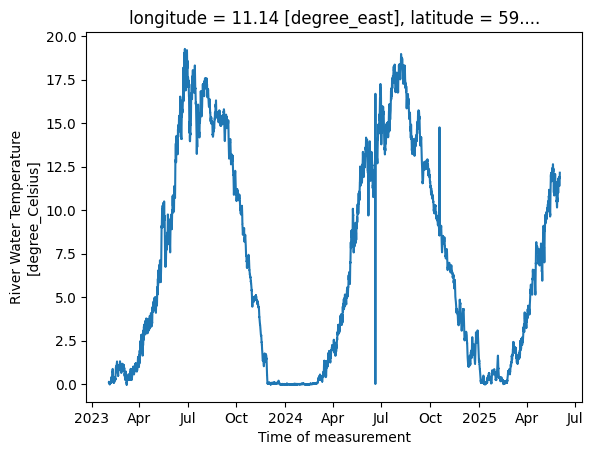

In [8]:
ds_gl.temp_water_avg.plot()